## <font color='BLUE'>**Detecção de Fraude em Transferências Bancárias**</font>



###"Os golpes em dados Bancários realizados pela internet **cresceu 43%** no Brasil"

- Link: https://economia.ig.com.br/2020-07-28/golpe-em-dados-bancarios-pela-internet-cresceu-43-no-brasil-saiba-se-proteger.html

# 1° Qual o Problema de Negócio

- Esse conjunto de dados fictício possui transações de transferências entre contas de uma mesma Instituição Financeira. São mais de 200 mil registros de transferências, sendo 490 Fraudulentas, ou seja, não foram realizadas pelo dono da conta corrente. Temos 28 variáveis explicativas e a variável Classe é o Target e assume o valor 1 em caso de fraude e 0 em caso contrário.

Criar maquina preditiva para detectar fraudes bancarias.



# 2° Análise Exploratória dos Dados

##### **Instalando biblioteca de versão**

In [2]:
# Instalando o pacote para gerar as versões dos pacotes usados
!pip install -q -U watermark

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


In [1]:
# Bibliotecas utilizadas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorando Alertas
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas utilizadas no Pré-Processamento dos Dados
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Bibliotecas utilizadas na Construção de Máquinas Preditivas
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas utilizadas na Avaliação das Máquinas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Exibindo os gráfico nesse Notebook
%matplotlib inline


###### **Visualizando as versões dos pacotes**

In [3]:
%reload_ext watermark
%watermark -a "Cientista Genial" --iversions

Author: Cientista Genial

matplotlib: 3.2.2
numpy     : 1.21.5
seaborn   : 0.11.2
pandas    : 1.3.5
IPython   : 5.5.0



#### <font color = 'DeepSkyBlue'> **Importando e conhecendo os Dados**</font>

In [8]:
# Lendo os Dados

from datetime import datetime
print(datetime.now())
df = pd.read_csv('/content/transferencias.csv')
print(datetime.now())

2022-04-15 19:11:54.981593
2022-04-15 19:11:57.855490


In [9]:
# Verificar o tamanho da base de dados "(Linhas, Colunas"
df.shape

(284807, 31)

In [10]:
# Visualizando as 5 primeiras lindas da base de dados
df.head()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Visualizando as 5 últimas linhas do DataFrame
df.tail()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
# Verificando o tipo de dados
df.dtypes

Timestamp          float64
pais               float64
cidade             float64
bairro             float64
cep                float64
ip                 float64
dia                float64
hora               float64
minuto             float64
so                 float64
valor              float64
antecedentes       float64
reclamacoes        float64
qtd_trans          float64
crt                float64
limite_global      float64
tipo_crt           float64
estabelecimento    float64
contas             float64
emprestimos        float64
navegador          float64
android            float64
ios                float64
compras            float64
hist_navegacao     float64
relacionamento     float64
ind_seguranca      float64
tempo_transacao    float64
lim_crt            float64
hist_saldo         float64
Target               int64
dtype: object

In [13]:
# Informações dos Atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        284807 non-null  float64
 1   pais             284807 non-null  float64
 2   cidade           284807 non-null  float64
 3   bairro           284807 non-null  float64
 4   cep              284807 non-null  float64
 5   ip               284807 non-null  float64
 6   dia              284807 non-null  float64
 7   hora             284807 non-null  float64
 8   minuto           284807 non-null  float64
 9   so               284807 non-null  float64
 10  valor            284807 non-null  float64
 11  antecedentes     284807 non-null  float64
 12  reclamacoes      284807 non-null  float64
 13  qtd_trans        284807 non-null  float64
 14  crt              284807 non-null  float64
 15  limite_global    284807 non-null  float64
 16  tipo_crt         284807 non-null  floa

In [14]:
# Verificando a quantidade de itens
df.count()

Timestamp          284807
pais               284807
cidade             284807
bairro             284807
cep                284807
ip                 284807
dia                284807
hora               284807
minuto             284807
so                 284807
valor              284807
antecedentes       284807
reclamacoes        284807
qtd_trans          284807
crt                284807
limite_global      284807
tipo_crt           284807
estabelecimento    284807
contas             284807
emprestimos        284807
navegador          284807
android            284807
ios                284807
compras            284807
hist_navegacao     284807
relacionamento     284807
ind_seguranca      284807
tempo_transacao    284807
lim_crt            284807
hist_saldo         284807
Target             284807
dtype: int64

In [15]:
# Verificando se há valores ausentes
df.isnull().sum().sum()

0

In [16]:
# Verificando se há valores duplicados
df.duplicated().sum()

1081

In [17]:
df.shape

(284807, 31)

In [18]:
# Eliminando linhas duplicadas
df.drop_duplicates(inplace=True)

In [19]:
df['Target'].value_counts()

0    283253
1       473
Name: Target, dtype: int64

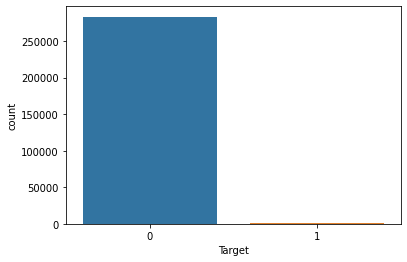

In [20]:
# Olhada na variável Target

sns.countplot(df['Target'])

In [21]:
# Explorando as correlações com o Target
df.corr()['Target'].sort_values(ascending=False)

Target             1.000000
antecedentes       0.149067
cep                0.129326
cidade             0.084624
emprestimos        0.033631
minuto             0.033068
android            0.026357
tempo_transacao    0.021892
navegador          0.021486
lim_crt            0.009682
hist_saldo         0.005777
ios                0.004887
ind_seguranca      0.004265
relacionamento     0.003202
limite_global     -0.003300
qtd_trans         -0.003897
compras           -0.006333
hist_navegacao    -0.007210
Timestamp         -0.012359
dia               -0.043915
ip                -0.087812
so                -0.094021
pais              -0.094486
contas            -0.105340
hora              -0.172347
bairro            -0.182322
tipo_crt          -0.187186
valor             -0.206971
reclamacoes       -0.250711
crt               -0.293375
estabelecimento   -0.313498
Name: Target, dtype: float64

In [22]:
# Correlação de Spearman
df.corr(method='spearman')

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
Timestamp,1.000000,0.191168,-0.006645,-0.473833,-0.142584,0.225921,-0.111450,0.116767,-0.104266,0.018631,...,0.096245,0.132122,0.149126,-0.015756,-0.259308,-0.000238,-0.034922,-0.143102,-0.039793,-0.011911
pais,0.191168,1.000000,-0.382613,-0.414041,0.101729,-0.109167,-0.085924,-0.230303,-0.235046,0.139723,...,-0.062846,-0.029439,0.145648,-0.001086,0.049339,0.006332,-0.107345,-0.209306,-0.087314,-0.040918
cidade,-0.006645,-0.382613,1.000000,0.074928,0.155240,0.345856,-0.111484,0.429022,0.005361,-0.078017,...,-0.098275,-0.056733,-0.095544,0.013221,-0.086880,0.034274,0.131177,0.139434,-0.502958,0.049435
bairro,-0.473833,-0.414041,0.074928,1.000000,0.060559,-0.225170,0.170794,-0.075247,0.165767,-0.031603,...,-0.039140,0.004614,-0.139767,-0.000650,0.032331,-0.016579,0.141501,0.180772,-0.000346,-0.057750
cep,-0.142584,0.101729,0.155240,0.060559,1.000000,0.021558,0.074181,0.061190,-0.010269,0.105961,...,0.039269,-0.004811,0.009918,-0.008885,0.060552,-0.063596,-0.033134,0.004967,-0.020948,0.061652
ip,0.225921,-0.109167,0.345856,-0.225170,0.021558,1.000000,-0.007673,0.430890,-0.054538,-0.055981,...,-0.040013,-0.011457,-0.107486,-0.022786,-0.015726,0.030332,0.013357,-0.027439,-0.314500,-0.028279
dia,-0.111450,-0.085924,-0.111484,0.170794,0.074181,-0.007673,1.000000,-0.293152,0.445178,0.028204,...,0.035697,0.040835,-0.050637,-0.134719,-0.010372,-0.023911,0.074291,0.020902,0.206235,-0.037979
hora,0.116767,-0.230303,0.429022,-0.075247,0.061190,0.430890,-0.293152,1.000000,-0.387762,-0.100142,...,-0.021198,-0.024306,-0.185515,-0.012940,-0.046924,0.017774,-0.094412,0.057408,-0.030312,-0.046583
minuto,-0.104266,-0.235046,0.005361,0.165767,-0.010269,-0.054538,0.445178,-0.387762,1.000000,-0.002547,...,0.076375,0.020798,0.074672,-0.024517,-0.074398,-0.008571,0.190867,0.089673,0.004133,0.022945
so,0.018631,0.139723,-0.078017,-0.031603,0.105961,-0.055981,0.028204,-0.100142,-0.002547,1.000000,...,-0.064862,0.002345,0.074259,-0.001422,-0.022545,0.027305,-0.001445,-0.104065,-0.077949,-0.048231


In [23]:
# Estatísticas descritivas das variáveis
df.describe()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# 3° Pré-Processamento dos dados

In [24]:
# Separando os dados em X e Y para o treinamento da máquina preditiva
X = df.drop(['Target'], axis=1)
y = df['Target']


### <font color = 'Chocolate'> **Balanceando o Target**</font>

In [25]:
#Balanceamento da Classe (Target)
#  A função "SMOTE" usando o "over_sampling" cria registro da classe positivo para que possamos fazer o balenceamento.
smt = SMOTE()

In [26]:
# Criando Registro balanceados
X, y = smt.fit_resample(X, y)

In [27]:
#Contagem do target depois do smote. Obs: Antes da contagem, para usar a função bincount, é preciso converter de float para inteiro
yi = y.astype(int)
np.bincount(yi)

array([283253, 283253])

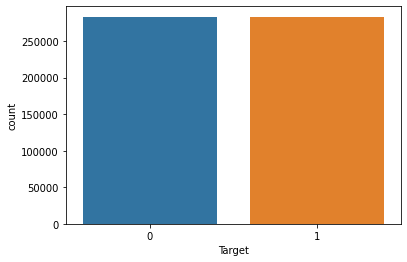

In [28]:
# Visualizando
ax = sns.countplot(x=yi)

### <font color = 'Chocolate'> **Separando os dados em treino e teste**</font>

In [29]:
# Dados de treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y) 

# 4° Criando a Máquina Preditiva de Detecção de Fraude

## <font color = 'Red'> **Random Forest**</font>

In [30]:
# Construindo o Modelo
model = RandomForestClassifier()


In [31]:
# Treinando o Modelo
# Vai demorar mais ou menos uns 6 minutos minutinhos

from datetime import datetime
print(datetime.now())

model = model.fit(X_train, y_train)
model
print(datetime.now())

2022-04-15 19:20:29.810174
2022-04-15 19:28:02.599007


In [32]:
# Passando novos dados (dados de teste) Para o modelo
y_predict = model.predict(X_val)

## 5° Avaliando a Máquina Preditiva

In [33]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acurácia: \n', accuracy_score(y_val, y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       1.00      1.00      1.00     84976

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

Acurácia: 
 0.9999293918282809
Confusion Matrix: 
 [[84964    12]
 [    0 84976]]


In [34]:
# Comparando gabarito e Previsoes_da_Máquina
real_vs_predito = pd.DataFrame({'Valor Real': y_val,'Valor Predito': y_predict})
real_vs_predito

,Valor Real,Valor Predito
526754,1,1
554912,1,1
501396,1,1
531590,1,1
415092,1,1
...,...,...
152496,0,0
411055,1,1
423270,1,1
438959,1,1


#XGBoost

In [35]:
# Construindo o Modelo
from xgboost import XGBClassifier
model = XGBClassifier()

In [36]:
# Treinando o Modelo
# Demora alguns minutinhos
from datetime import datetime
print(datetime.now())
model = model.fit(X_train, y_train)
model
print(datetime.now())

2022-04-15 19:32:00.215277
2022-04-15 19:33:58.011455


In [37]:
# Passando novos dados (dados de teste) Para o modelo
y_predict = model.predict(X_val)


## 5° Avaliando a Máquina Preditiva

In [38]:
# Comparando gabarito e Previsoes_da_Máquina
gabarito = pd.DataFrame({'Gabarito': y_val,'Previsoes_da_Máquina': y_predict})
gabarito

,Gabarito,Previsoes_da_Máquina
526754,1,1
554912,1,1
501396,1,1
531590,1,1
415092,1,1
...,...,...
152496,0,0
411055,1,1
423270,1,1
438959,1,1


In [39]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acurácia: \n', accuracy_score(y_val, y_predict))
#0.98684  F1 99%
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     84976
           1       0.99      0.98      0.99     84976

    accuracy                           0.99    169952
   macro avg       0.99      0.99      0.99    169952
weighted avg       0.99      0.99      0.99    169952

Acurácia: 
 0.9865197232159668
Confusion Matrix: 
 [[84403   573]
 [ 1718 83258]]


#LightGBM

In [41]:
# Light GBM
from datetime import datetime
print(datetime.now())

import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
#setting parameters for lightgbm
param = {'num_leaves':1000,         #número de folhas em uma árvore; padrão = 31; type = int
         'objective':'binary',     
         'max_depth':7,
         'learning_rate':.01,
         'max_bin':200}

param['metric'] = ['auc', 'binary_logloss']

#training our model using light gbm
num_round=50

lgbm=lgb.train(param,train_data,num_round)
print(datetime.now())

2022-04-15 19:36:53.906991
2022-04-15 19:37:00.935861


In [42]:
# Passando novos dados (dados de teste) Para o modelo
y_predict = lgbm.predict(X_val)

## 5° Avaliando a Máquina Preditiva

In [43]:
# Comparando gabarito e Previsoes_da_Máquina
gabarito = pd.DataFrame({'Gabarito': y_val,'Previsoes_da_Máquina': y_predict})
gabarito

,Gabarito,Previsoes_da_Máquina
526754,1,0.696878
554912,1,0.696878
501396,1,0.696878
531590,1,0.696878
415092,1,0.696878
...,...,...
152496,0,0.305246
411055,1,0.696878
423270,1,0.696878
438959,1,0.682188


In [44]:
y_predict.size

169952

In [47]:
#converting probabilities into 0 or 1
for i in range(0,169952):
    if y_predict[i]>=.5:       # setting threshold to .5
       y_predict[i]=1
    else:  
       y_predict[i]=0

In [48]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acurácia: \n', accuracy_score(y_val, y_predict))
#0.9843  F1 98%
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     84976
           1       0.99      0.98      0.98     84976

    accuracy                           0.98    169952
   macro avg       0.98      0.98      0.98    169952
weighted avg       0.98      0.98      0.98    169952

Acurácia: 
 0.9848780832234983
Confusion Matrix: 
 [[84351   625]
 [ 1945 83031]]


# Documentação do **LightGBM**

- Link: https://lightgbm.readthedocs.io/en/latest/


O **LightGBM** é uma estrutura de aumento de gradiente que usa algoritmos de aprendizagem baseados em árvore. Ele é projetado para ser distribuído e eficiente com as seguintes vantagens:

* Maior velocidade de treinamento e maior eficiência.

* Menor uso de memória.

* Melhor precisão.

* Suporte de aprendizagem paralela e GPU.

* Capaz de lidar com dados em grande escala.

![alt text](https://miro.medium.com/fit/c/184/184/0*CszCU2p5Ml6WbnH3.gif) 

**Conclusão:** Foi utilizado tres dferentes tipos de algoritimos e obtivemos diferentes resultados:

1- ***Randon Forest:*** o tempo de processamento do modelo foi o maior e tambem obteve a melhor Acuracia = 0.9999293918282809 e foi o que mais acertou as previsões.

2- ***XGBoost:*** o tempo de processamento do modelo foi menor do que o Randon Forest e teve uma boa Acuracia =  0.9865197232159668 porem menor, e acertou menos as previsões.

3- ***LightGBM:*** o tempo de processamento do modelo foi o menor de todos e obteve uma boa Acuracia =  0.9848780832234983 e foi o que mais errou as previsões.